# data analytics project of consumer complaints

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# project analysis
1. business problem
2. data extraction
3. basics analysis
4. eda
5. data cleaning

In [3]:
os.chdir(r"C:\machine learning\consumer complaints")

In [7]:
complaint=pd.read_csv("consumer_complaints.csv")

In [8]:
complaint.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [9]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [10]:
complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [12]:
complaint.shape

(555957, 18)

In [13]:
complaint.describe()

,complaint_id
count,5.559570e+05
mean,9.600510e+05
std,5.504296e+05
min,1.000000e+00
25%,4.863230e+05
50%,9.737830e+05
75%,1.441702e+06
max,1.895894e+06


In [14]:
ugfdef missing(data):
    per=data.isnull().sum()/len(data)*100
    miss=data.isnull().sum()
    missing_v=pd.concat([miss,per],keys=["missing","percentage"],axis=1)
    missing_val=missing_v[missing_v["missing"]>=1]#missing values in the data

    return missing_val

In [16]:
missing_data=missing(complaint)
#missing_data.to_csv(r"C:\machine learning\consumer complaints\missing_per.csv")

In [17]:
missing_data

,missing,percentage
sub_product,158322,28.477382
sub_issue,343335,61.755675
consumer_complaint_narrative,489151,87.983603
company_public_response,470833,84.688744
state,4887,0.879025
zipcode,4505,0.810314
tags,477998,85.977513
consumer_consent_provided,432499,77.793606


In [19]:
missing_data.columns

Index(['missing', 'percentage'], dtype='object')

In [20]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [31]:
product=complaint["product"].value_counts()/len(complaint["product"])*100
product

Mortgage                   33.541263
Debt collection            18.176226
Credit reporting           16.521781
Credit card                11.955601
Bank account or service    11.253208
Consumer Loan               3.775472
Student loan                2.848961
Payday loan                 0.697356
Money transfers             0.685665
Prepaid card                0.444279
Other financial service     0.100188
Name: product, dtype: float64

In [34]:
#product.to_csv("C:\machine learning\consumer complaints\product.csv")


In [38]:
! pip install plotly

In [48]:
import plotly.tools as tls
#import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [49]:
labels = list(product.index)
values = product.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)


In [50]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [52]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [53]:
count_values_in_column(complaint,"company_response_to_consumer")

,Total,Percentage
Closed with explanation,404293,72.72
Closed with non-monetary relief,70237,12.63
Closed with monetary relief,38262,6.88
Closed without relief,17909,3.22
Closed,13399,2.41
Closed with relief,5305,0.95
In progress,3763,0.68
Untimely response,2789,0.50


In [54]:
count_values_in_column(complaint,"consumer_disputed?")

,Total,Percentage
No,443823,79.83
Yes,112134,20.17


In [58]:
disputed=complaint["consumer_disputed?"].value_counts()

In [61]:
consumer=complaint["company_response_to_consumer"].value_counts()

In [63]:
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000'])
    )
layout = go.Layout(title='consumer disputed')
fig = go.Figure(data=[total_complaints_plotly], layout=layout)
iplot(fig)

complaints_plotly = go.Bar(
            x=consumer.index.values,
            y=consumer.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000','#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484'])
    )
layout1 = go.Layout(title='consumer response')
fig = go.Figure(data=[complaints_plotly], layout=layout1)
iplot(fig)


In [64]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [68]:
com_dis_yes=complaint[complaint["consumer_disputed?"]=="Yes"]
com_dis_No=complaint[complaint["consumer_disputed?"]=="No"]

In [79]:
top_5=count_values_in_column(com_dis_yes,"company")[:5]
top_5

,Total,Percentage
Bank of America,12480,11.13
Wells Fargo & Company,9644,8.60
JPMorgan Chase & Co.,7716,6.88
Equifax,6647,5.93
Citibank,5245,4.68


In [80]:
least_5=count_values_in_column(com_dis_No,"company")[:5]
least_5

,Total,Percentage
Bank of America,43518,9.81
Wells Fargo & Company,32380,7.30
Experian,27014,6.09
JPMorgan Chase & Co.,26165,5.90
Equifax,25181,5.67


In [85]:
least5=com_dis_No["company"].value_counts()[:5]

In [86]:
top5=com_dis_yes["company"].value_counts()[:5]

In [87]:
top5_nodisputes_plotly = go.Bar(
            x=top5.index.values,
            y=least5.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=least5.values,
        colorscale='Blues')
    )
layout1 = go.Layout(title='consumer response')
fig = go.Figure(data=[top5_nodisputes_plotly], layout=layout1)
iplot(fig)

In [98]:
n_disputes=count_values_in_column(com_dis_No,"company")
n_disputes.columns

Index(['Total', 'Percentage'], dtype='object')

In [93]:
disputes=count_values_in_column(com_dis_yes,"company")
disputes.columns

Index(['Total', 'Percentage'], dtype='object')

In [101]:
top=disputes.nlargest(columns="Total",n=5)
n_top=n_disputes.nlargest(columns="Total",n=5)
n_top

,Total,Percentage
Bank of America,43518,9.81
Wells Fargo & Company,32380,7.30
Experian,27014,6.09
JPMorgan Chase & Co.,26165,5.90
Equifax,25181,5.67


In [103]:
top5_nodisputes_plotly1 = go.Bar(
            x=top.index.values,
            y=least5.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=least5.values,
        colorscale='Blues')
    )
layout1 = go.Layout(title='consumer response')
fig = go.Figure(data=[top5_nodisputes_plotly1], layout=layout1)
iplot(fig)

# top 5 companies most desputes by year

In [104]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [105]:
complaint.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [106]:
import datetime as dt

In [107]:
complaint["date_received"]=pd.to_datetime(complaint["date_received"])

In [108]:
complaint["date_received"].dtype

dtype('<M8[ns]')

In [109]:
complaint["date_received"]

0        2013-08-30
1        2013-08-30
2        2013-08-30
3        2013-08-30
4        2013-08-30
            ...    
555952   2014-07-01
555953   2014-07-01
555954   2012-07-10
555955   2015-04-14
555956   2014-08-14
Name: date_received, Length: 555957, dtype: datetime64[ns]

In [110]:
complaint["date_received_year"],complaint["date_received_month"]=complaint["date_received"].dt.year,complaint["date_received"].dt.month

In [115]:
complaint.iloc[:,-2:]

,date_received_year,date_received_month
0,2013,8
1,2013,8
2,2013,8
3,2013,8
4,2013,8
...,...,...
555952,2014,7
555953,2014,7
555954,2012,7
555955,2015,4


In [116]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'date_received_year', 'date_received_month'],
      dtype='object')

In [122]:
group=complaint.groupby(["date_received_year","consumer_disputed?"])["company"].apply(lambda x: x.value_counts())
                                                                                 

In [129]:
grou_d={"crm":group}

In [130]:
grou_d

{'crm': date_received_year  consumer_disputed?                              
 2011                No                  Bank of America                 432
                                         JPMorgan Chase & Co.            298
                                         Citibank                        255
                                         Capital One                     201
                                         Wells Fargo & Company           170
                                                                        ... 
 2016                Yes                 United PanAm Financial Corp.      1
                                         Prince Parker & Associates        1
                                         Blitt and Gaines, P.C.            1
                                         Avante                            1
                                         Ragan & Ragan, PC                 1
 Name: company, Length: 13399, dtype: int64}

In [137]:
crm=pd.DataFrame(data=grou_d).reset_index()
crm=crm.sort_values(by="crm",ascending=False)
crm.columns

Index(['date_received_year', 'consumer_disputed?', 'level_2', 'crm'], dtype='object')

In [139]:
crm.rename(columns={"level_2":"company"},inplace=True)

In [140]:
crm

,date_received_year,consumer_disputed?,company,crm
782,2013,No,Bank of America,12889
112,2012,No,Bank of America,12323
6364,2015,No,Experian,9448
6365,2015,No,Equifax,9332
2890,2014,No,Experian,8996
...,...,...,...,...
9001,2015,No,"Seashine Financial, LLC",1
9000,2015,No,G & D COMPLIANCE,1
8999,2015,No,Cannon & Cannon Firm PC,1
8998,2015,No,"Bifulco and Associates, P.C.",1


In [141]:
crm.head()

,date_received_year,consumer_disputed?,company,crm
782,2013,No,Bank of America,12889
112,2012,No,Bank of America,12323
6364,2015,No,Experian,9448
6365,2015,No,Equifax,9332
2890,2014,No,Experian,8996


In [145]:
top5#top 5 bank list of the data

Bank of America          12480
Wells Fargo & Company     9644
JPMorgan Chase & Co.      7716
Equifax                   6647
Citibank                  5245
Name: company, dtype: int64

In [147]:
boa=crm[(crm["company"]=="Bank of America")&(crm["consumer_disputed?"]=="Yes")]
wfc=crm[(crm["company"]=="Wells Fargo & Company")&(crm["consumer_disputed?"]=="Yes")]
jpmorgan=crm[(crm["company"]=="JPMorgan Chase & Co.")&(crm["consumer_disputed?"]=="Yes")]
equi=crm[(crm["company"]=="Equifax")&(crm["consumer_disputed?"]=="Yes")]
citi=crm[(crm["company"]=="Citibank")&(crm["consumer_disputed?"]=="Yes")]

In [148]:
boa.columns

Index(['date_received_year', 'consumer_disputed?', 'company', 'crm'], dtype='object')

In [159]:
years=crm["date_received_year"].unique().tolist()

In [151]:
boa_amount=boa["crm"].values.tolist()
wfc_amount=wfc["crm"].values.tolist()
jp_amount=jpmorgan["crm"].values.tolist()
equi_amount=equi["crm"].values.tolist()
citi_amount=citi["crm"].values.tolist()


In [155]:
boa_text=[str(b) + " \n disputes" for b in boa_amount]
wfc_text=[str(w) + " \n disputes" for w in wfc_amount]
jp_text=[str(j) + " \n disputes" for j in jp_amount]
eq_text=[str(e) + " \n disputes" for e in equi_amount]
citi_text=[str(c) + " \n disputes" for c in citi_amount]


In [165]:
boa_disputes_chart = go.Scatter(
    x=years,
    y=boa_amount,
    text=boa_text,
    name='Bank of America', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 22, 235)',
             ),
    fill='tonexty'
)
wfc_disputes_chart = go.Scatter(
    x=years,
    y=wfc_amount,
    text=wfc_text,
    name='Wells Fargo & Company', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(275, 170, 0)',
             ),
    fill='tonexty'
)
jp_disputes_chart = go.Scatter(
    x=years,
    y=jp_amount,
    text=jp_text,
    name='jp morgan & Company', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(200, 0, 135)',
             ),
    fill='tonexty'
)

equi_disputes_chart = go.Scatter(
    x=years,
    y=equi_amount,
    text=eq_text,
    name='equi & Company', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 145, 175)',
             ),
    fill='tonexty'
)


citi_disputes_chart = go.Scatter(
    x=years,
    y=citi_amount,
    text=citi_text,
    name='citi bank & Company', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(100, 22, 170)',
             ),
    fill='tonexty'
)
layout = dict(title = 'Number of Disputes <br> (Top 5 Companies)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Disputes')
             )

data=[boa_disputes_chart,wfc_disputes_chart,jp_disputes_chart,equi_disputes_chart,citi_disputes_chart]
fig = dict(data=data, layout=layout)


iplot(fig, filename='basic-area-no-bound')

In [167]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'date_received_year', 'date_received_month'],
      dtype='object')

In [168]:
def customerservice_per_month(month, dispute):
    result = complaint.loc[(complaint['date_received_month'] == month) & (complaint['consumer_disputed?'] == dispute)]
    return result

In [238]:
def customerservice_per_month1(year, dispute):
    result = complaint.loc[(complaint['date_received_year'] == year) & (complaint['consumer_disputed?'] == dispute)]
    return result

In [220]:
year=complaint["date_received_year"].unique().tolist()

In [173]:
dis_jan=len(customerservice_per_month(1,"Yes"))
dis_feb=len(customerservice_per_month(2,"Yes"))
dis_mar=len(customerservice_per_month(3,"Yes"))
dis_apr=len(customerservice_per_month(4,"Yes"))
dis_may=len(customerservice_per_month(5,"Yes"))
dis_jun=len(customerservice_per_month(6,"Yes"))
dis_jul=len(customerservice_per_month(7,"Yes"))
dis_aug=len(customerservice_per_month(8,"Yes"))
dis_sep=len(customerservice_per_month(9,"Yes"))
dis_oct=len(customerservice_per_month(10,"Yes"))
dis_nov=len(customerservice_per_month(11,"Yes"))
dis_dec=len(customerservice_per_month(12,"Yes"))

In [172]:
ndis_jan=len(customerservice_per_month(1,"No"))
ndis_feb=len(customerservice_per_month(2,"No"))
ndis_mar=len(customerservice_per_month(3,"No"))
ndis_apr=len(customerservice_per_month(4,"No"))
ndis_may=len(customerservice_per_month(5,"No"))
ndis_jun=len(customerservice_per_month(6,"No"))
ndis_jul=len(customerservice_per_month(7,"No"))
ndis_aug=len(customerservice_per_month(8,"No"))
ndis_sep=len(customerservice_per_month(9,"No"))
ndis_oct=len(customerservice_per_month(10,"No"))
ndis_nov=len(customerservice_per_month(11,"No"))
ndis_dec=len(customerservice_per_month(12,"No"))

In [174]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
disputes_bymonth=[dis_jan,dis_feb,dis_mar,dis_apr,dis_may,dis_jun,dis_jul,dis_aug,dis_sep,dis_oct,
                 dis_nov,dis_dec]
ndisputes_bymonth=[ndis_jan,ndis_feb,ndis_mar,ndis_apr,ndis_may,ndis_jun,ndis_jul,ndis_aug,ndis_sep,ndis_oct,
                 ndis_nov,ndis_dec]

In [184]:


disputes_chart = go.Bar(
    y=months,
    x=disputes_bymonth,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3232',
        width=1.5
    ))
)

ndisputes_chart = go.Bar(
    y=months,
    x=ndisputes_bymonth,
    orientation='h',
    name='nonDisputes',
    text='nonDisputes',
    marker=dict(
        color='#A9FFA9',
    line=dict(
        color='#59AF59',
        width=1.5
    ))
)
data=[disputes_chart,ndisputes_chart]
layout = dict(title = 'Number of activities by month',
              xaxis = dict(title = 'activities'),
              yaxis = dict(title = 'months')
             )
fig = dict(data=data,layout=layout)


iplot(fig, filename='basic-area-no-bound')

In [237]:
complaint["date_received_year"].value_counts()

2015    168621
2014    153138
2013    108273
2012     72523
2016     50853
2011      2549
Name: date_received_year, dtype: int64

In [239]:
dis_11=len(customerservice_per_month1(2011,"Yes"))
dis_12=len(customerservice_per_month1(2012,"Yes"))
dis_13=len(customerservice_per_month1(2013,"Yes"))
dis_14=len(customerservice_per_month1(2014,"Yes"))
dis_15=len(customerservice_per_month1(2015,"Yes"))
dis_16=len(customerservice_per_month1(2016,"Yes"))


In [240]:
ndis_11=len(customerservice_per_month1(2011,"No"))
ndis_12=len(customerservice_per_month1(2012,"No"))
ndis_13=len(customerservice_per_month1(2013,"No"))
ndis_14=len(customerservice_per_month1(2014,"No"))
ndis_15=len(customerservice_per_month1(2015,"No"))
ndis_16=len(customerservice_per_month1(2016,"No"))


In [241]:
disputes_year=[dis_11,dis_12,dis_13,dis_14,dis_15,dis_16]
non_disputes_year=[ndis_11,ndis_12,ndis_13,ndis_14,ndis_15,ndis_16]

In [242]:
disputes_chart1 = go.Bar(
    y=year,
    x=disputes_year,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3232',
        width=1.5
    ))
)

ndisputes_chart1 = go.Bar(
    y=year,
    x=non_disputes_year,
    orientation='h',
    name='nonDisputes',
    text='nonDisputes',
    marker=dict(
        color='#A9FFA9',
    line=dict(
        color='#59AF59',
        width=1.5
    ))
)
data=[disputes_chart1,ndisputes_chart1]
layout = dict(title = 'Number of activities by year',
              xaxis = dict(title = 'activities'),
              yaxis = dict(title = 'year')
             )
fig = dict(data=data,layout=layout)


iplot(fig, filename='basic-area-no-bound')

In [186]:
#from collections import Counter
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [188]:
stopwords=set(STOPWORDS)

complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'date_received_year', 'date_received_month'],
      dtype='object')

In [189]:
complaint["issue"].value_counts()

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
                                            ...  
Lost or stolen money order                     25
Incorrect exchange rate                        16
Lender damaged or destroyed vehicle             5
Lender sold the property                        5
Lender damaged or destroyed property            1
Name: issue, Length: 95, dtype: int64

In [193]:
dis_issue=complaint["issue"].loc[complaint["consumer_disputed?"]=="Yes"]
ndis_issue=complaint["issue"].loc[complaint["consumer_disputed?"]=="No"]

(-0.5, 399.5, 199.5, -0.5)

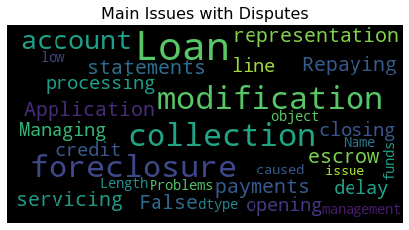

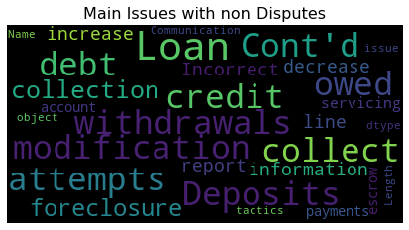

In [274]:
disputed_wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
    ).generate(str(dis_issue)
)
ndisputed_wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
    ).generate(str(ndis_issue)
)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.imshow(disputed_wordcloud)
plt.title('Main Issues with Disputes', fontsize=16)
plt.axis('off')

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.imshow(ndisputed_wordcloud)
plt.title('Main Issues with non Disputes', fontsize=16)
plt.axis('off')

In [195]:
top5

Bank of America          12480
Wells Fargo & Company     9644
JPMorgan Chase & Co.      7716
Equifax                   6647
Citibank                  5245
Name: company, dtype: int64

In [205]:
boa=complaint["issue"].loc[(complaint["consumer_disputed?"]=="Yes")&(complaint["company"]=="Bank of America")]

wfs=complaint["issue"].loc[(complaint["consumer_disputed?"]=="Yes")&(complaint["company"]=="Wells Fargo & Company")]

jp=complaint["issue"].loc[(complaint["consumer_disputed?"]=="Yes")&(complaint["company"]=="JPMorgan Chase & Co.")]

eqi=complaint["issue"].loc[(complaint["consumer_disputed?"]=="Yes")&(complaint["company"]=="Equifax")]

cit=complaint["issue"].loc[(complaint["consumer_disputed?"]=="Yes")&(complaint["company"]=="Citibank")]


(-0.5, 399.5, 199.5, -0.5)

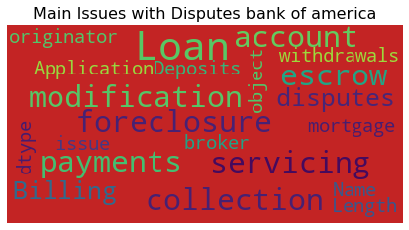

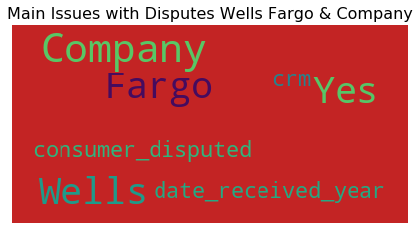

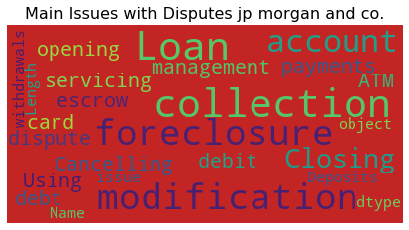

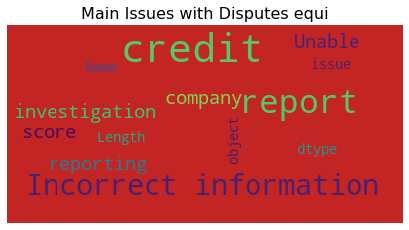

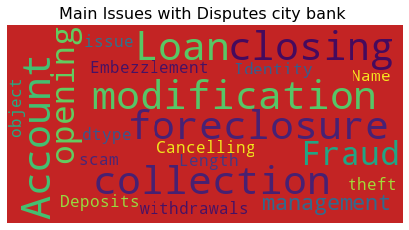

In [207]:
disputed_wordcloud_boa = WordCloud(
    background_color='rgb(195, 36, 36)',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
    ).generate(str(boa)
)

disputed_wordcloud_wfs = WordCloud(
    background_color='rgb(195, 36, 36)',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
    ).generate(str(wfc)
)

disputed_wordcloud_jp = WordCloud(
    background_color='rgb(195, 36, 36)',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
    ).generate(str(jp)
)

disputed_wordcloud_eq = WordCloud(
    background_color='rgb(195, 36, 36)',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
    ).generate(str(eqi)
)

disputed_wordcloud_cit = WordCloud(
    background_color='rgb(195, 36, 36)',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
    ).generate(str(cit)
)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.imshow(disputed_wordcloud_boa)
plt.title('Main Issues with Disputes bank of america', fontsize=16)
plt.axis('off')

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.imshow(disputed_wordcloud_wfs)
plt.title('Main Issues with Disputes Wells Fargo & Company', fontsize=16)
plt.axis('off')

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.imshow(disputed_wordcloud_jp)
plt.title('Main Issues with Disputes jp morgan and co.', fontsize=16)
plt.axis('off')

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.imshow(disputed_wordcloud_eq)
plt.title('Main Issues with Disputes equi', fontsize=16)
plt.axis('off')

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.imshow(disputed_wordcloud_cit)
plt.title('Main Issues with Disputes city bank ', fontsize=16)
plt.axis('off')

# complaint top 5 company 

In [256]:
top5

Bank of America          12480
Wells Fargo & Company     9644
JPMorgan Chase & Co.      7716
Equifax                   6647
Citibank                  5245
Name: company, dtype: int64

In [246]:
dispute_presence = complaint.loc[complaint['consumer_disputed?'] == 'Yes']
cross_month = pd.crosstab(dispute_presence['state'], dispute_presence['company']).apply(lambda x: x/x.sum() * 100)
cross_month.head()#while using cross tab state will be row and company will be column

company,1st Alliance Lending,"1st Capital Mortgage, LLC",1st Franklin Financial Corporation,1st Maryland Mortgage Corporation,1st Midwest Mortgage Corp,"1st Money Center, Inc.","1st Priority Mortgage, Inc.",21st Mortgage Corporation,360 Mortgage,"3rd Generation, Inc.",...,Zarvad III S.A.,"Zarzaur and Schwartz, PC","Zeller & Associates, LLC",Zenith Financial Network Inc,ZestFinance,Zions Bancorporation,Zions First National Bank,Zwicker & Associates,eCon Credit LP,iServe Trust
state,,,,,,,,,,,,,,,,,,,,,
AA,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AK,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,0.0,0.0,44.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AP,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [261]:
df_boa = pd.DataFrame(cross_month['Bank of America']).reset_index().sort_values(by="Bank of America", ascending=False).round(2)
boa_2=df_boa[df_boa["Bank of America"]>=2]
boa_2

,state,Bank of America
8,CA,20.22
13,FL,11.00
42,NY,5.78
53,TX,5.33
15,GA,4.82
39,NJ,3.89
26,MD,3.86
55,VA,3.54
29,MI,2.91
20,IL,2.90


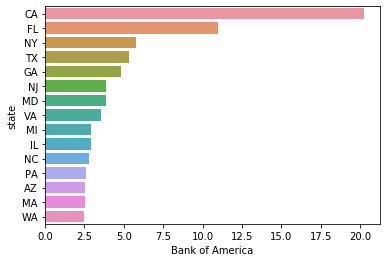

In [255]:
sns.barplot(boa_2["Bank of America"],boa_2["state"])

In [260]:
df_wfs = pd.DataFrame(cross_month['Wells Fargo & Company']).reset_index().sort_values(by="Wells Fargo & Company", ascending=False).round(2)
df_wfs
wfs_2=df_wfs[df_wfs["Wells Fargo & Company"]>=2]
wfs_2

,state,Wells Fargo & Company
8,CA,20.88
13,FL,9.86
53,TX,5.67
39,NJ,5.32
42,NY,5.29
15,GA,4.54
26,MD,3.92
35,NC,3.87
55,VA,3.49
46,PA,3.48


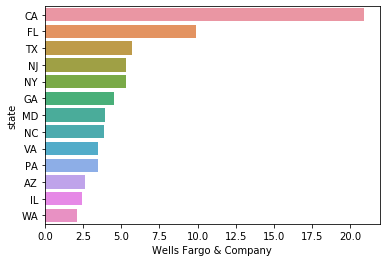

In [262]:
sns.barplot(wfs_2["Wells Fargo & Company"],wfs_2["state"])

In [263]:
top5

Bank of America          12480
Wells Fargo & Company     9644
JPMorgan Chase & Co.      7716
Equifax                   6647
Citibank                  5245
Name: company, dtype: int64

In [264]:
jp = pd.DataFrame(cross_month['JPMorgan Chase & Co.']).reset_index().sort_values(by="JPMorgan Chase & Co.", ascending=False).round(2)
jp
jp=jp[jp["JPMorgan Chase & Co."]>=2]
jp

,state,JPMorgan Chase & Co.
8,CA,19.40
42,NY,11.34
13,FL,8.72
53,TX,6.39
20,IL,4.94
39,NJ,3.95
29,MI,3.21
15,GA,3.09
58,WA,2.92
7,AZ,2.76


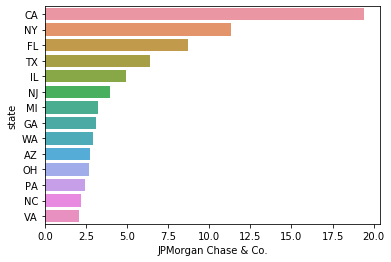

In [266]:
sns.barplot(jp["JPMorgan Chase & Co."],jp["state"])

In [267]:
top5

Bank of America          12480
Wells Fargo & Company     9644
JPMorgan Chase & Co.      7716
Equifax                   6647
Citibank                  5245
Name: company, dtype: int64

In [268]:
eq = pd.DataFrame(cross_month['Equifax']).reset_index().sort_values(by="Equifax", ascending=False).round(2)
eq
eq=eq[eq["Equifax"]>=2]
eq

,state,Equifax
8,CA,12.65
13,FL,10.38
53,TX,8.67
15,GA,6.18
42,NY,5.86
55,VA,4.37
35,NC,3.69
20,IL,3.66
26,MD,3.66
39,NJ,3.27


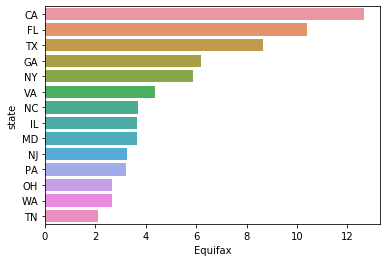

In [269]:
sns.barplot(eq["Equifax"],eq["state"])

In [270]:
top5

Bank of America          12480
Wells Fargo & Company     9644
JPMorgan Chase & Co.      7716
Equifax                   6647
Citibank                  5245
Name: company, dtype: int64

In [271]:
ci = pd.DataFrame(cross_month['Citibank']).reset_index().sort_values(by="Citibank", ascending=False).round(2)
ci
ci=ci[ci["Citibank"]>=2]
ci

,state,Citibank
8,CA,16.43
42,NY,10.96
13,FL,8.85
53,TX,6.73
39,NJ,4.92
20,IL,3.94
15,GA,3.64
26,MD,3.60
43,OH,3.42
55,VA,3.10


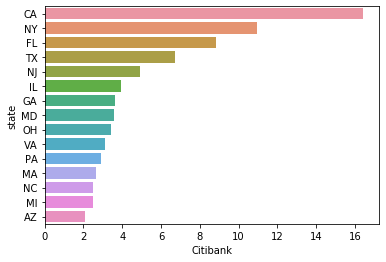

In [272]:
sns.barplot(ci["Citibank"],ci["state"])

In [273]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'date_received_year', 'date_received_month'],
      dtype='object')

In [289]:
time=complaint["timely_response"].unique().tolist()

In [279]:
def customerservice_timely_res(time_res, dispute):
    result = complaint.loc[(complaint['timely_response'] == time_res) & (complaint['consumer_disputed?'] == dispute)]
    return result

In [285]:
dis_yes=len(customerservice_timely_res("Yes","Yes"))
dis_no=len(customerservice_timely_res("No","Yes"))
ndis_yes=len(customerservice_timely_res("Yes","No"))
ndis_no=len(customerservice_timely_res("No","No"))

In [286]:

print("timely responses when disputed {} ".format(dis_yes))
print("timely no-responses when disputed {} ".format(dis_no))
print("timely responses when non-disputed {} ".format(ndis_yes))
print("timely no-responses when non-disputed {} ".format(ndis_no))

timely responses when disputed 110421 
timely no-responses when disputed 1713 
timely responses when non-disputed 431488 
timely no-responses when non-disputed 12335 


In [291]:
dispute=[dis_yes,dis_no]
non_dispute=[ndis_yes,ndis_no]


In [293]:
disputes_chart1 = go.Bar(
    y=time,
    x=dispute,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3232',
        width=1.5
    ))
)

ndisputes_chart1 = go.Bar(
    y=time,
    x=non_dispute,
    orientation='h',
    name='nonDisputes',
    text='nonDisputes',
    marker=dict(
        color='#A9FFA9',
    line=dict(
        color='#59AF59',
        width=1.5
    ))
)
data=[disputes_chart1,ndisputes_chart1]
layout = dict(title = 'Number of timely responses',
              xaxis = dict(title = 'consumer disputed'),
              yaxis = dict(title = 'timely responses')
             )
fig = dict(data=data,layout=layout)


iplot(fig, filename='basic-area-no-bound')

In [294]:
complaint.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'date_received_year', 'date_received_month'],
      dtype='object')

# conclusion report

1. state wise top companies disposed report we have to sse that during analysis or visualizing the plots most of the companies disputed complaints in CA states that state were registered in all the companies trhe compalints 

# issue with compalints problems

1. bank of america issue lots of complaint relatec to loan,servicing ,mortgage and many problems
2. city bank also faces same modification,loan,opening of account,foreclosure of account,fraud
   and jp also face similar issues

3. equi co. faces some issues credit and information regarding issue and wfs are less issue faces

# year and month wise face disputes

 in year 2012 and 2016 has face more  disputes by company but non disputes also in both the year that 
 means data are very populated in both the year and the months wise march month faces the disputes    problem

# timely responses 
 
 when consumer has timely responses more but they can disputes

# missing values treatment

In [296]:
complaint.dtypes

date_received                   datetime64[ns]
product                                 object
sub_product                             object
issue                                   object
sub_issue                               object
consumer_complaint_narrative            object
company_public_response                 object
company                                 object
state                                   object
zipcode                                 object
tags                                    object
consumer_consent_provided               object
submitted_via                           object
date_sent_to_company                    object
company_response_to_consumer            object
timely_response                         object
consumer_disputed?                      object
complaint_id                             int64
date_received_year                       int64
date_received_month                      int64
dtype: object

In [297]:
df_consumer=complaint#make a copy of the data for future use  

In [298]:
complaint.drop(columns=["date_received"],inplace=True)
 

In [299]:
complaint.shape

(555957, 19)

In [301]:
complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   product                       555957 non-null  object
 1   sub_product                   397635 non-null  object
 2   issue                         555957 non-null  object
 3   sub_issue                     212622 non-null  object
 4   consumer_complaint_narrative  66806 non-null   object
 5   company_public_response       85124 non-null   object
 6   company                       555957 non-null  object
 7   state                         551070 non-null  object
 8   zipcode                       551452 non-null  object
 9   tags                          77959 non-null   object
 10  consumer_consent_provided     123458 non-null  object
 11  submitted_via                 555957 non-null  object
 12  date_sent_to_company          555957 non-null  object
 13 

In [303]:
category=complaint.select_dtypes(["object"]).columns

In [305]:
category_data=complaint[category]

In [306]:
missing(category_data)

,missing,percentage
sub_product,158322,28.477382
sub_issue,343335,61.755675
consumer_complaint_narrative,489151,87.983603
company_public_response,470833,84.688744
state,4887,0.879025
zipcode,4505,0.810314
tags,477998,85.977513
consumer_consent_provided,432499,77.793606


In [310]:
for i in category_data.columns:
    print(i)
    print(complaint[i].value_counts(dropna=False))

product
Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64
sub_product
NaN                                       158322
Other mortgage                             74319
Conventional fixed mortgage                57182
Checking account                           44369
Other (i.e. phone, health club, etc.)      29617
I do not know                              21634
Conventional adjustable mortgage (ARM)     20941
Credit card                                20825
FHA mortgage                               19152
Non-federal student loan                   17969
Medical                                    13297
Vehicle loan                           

In [311]:
def unique_values_in_column(data,feature):
    unique_val=pd.Series(data[feature].unique())
    return pd.concat([unique_val],axis=1,keys=['Unique Values'])  

In [347]:
unique_values_in_column(complaint,"sub_product")

,Unique Values
0,Other mortgage
1,NaN
2,Non-federal student loan
3,Credit card
4,Checking account
5,Conventional adjustable mortgage (ARM)
6,"Other (i.e. phone, health club, etc.)"
7,FHA mortgage
8,Conventional fixed mortgage
9,Other bank product/service


In [348]:
complaint.columns

Index(['product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'date_received_year', 'date_received_month'],
      dtype='object')

In [349]:
unique_values_in_column(complaint,"consumer_complaint_narrative")

,Unique Values
0,NaN
1,XXXX has claimed I owe them {$27.00} for XXXX ...
2,Due to inconsistencies in the amount owed that...
3,In XX/XX/XXXX my wages that I earned at my job...
4,I have an open and current mortgage with Chase...
...,...
65642,"XXXX XXXX is reporting incorrectly, payments h..."
65643,Reflecting incorrect payment status. Have been...
65644,I have been paying {$180.00} a month through d...
65645,I recently became aware that Amerisave Mortgag...


In [350]:
unique_values_in_column(complaint,"company_public_response")

,Unique Values
0,NaN
1,Company chooses not to provide a public response
2,Company believes it acted appropriately as aut...
3,Company believes complaint caused principally ...
4,Company believes the complaint is the result o...
5,Company believes complaint is the result of an...
6,Company can't verify or dispute the facts in t...
7,Company disputes the facts presented in the co...
8,Company believes complaint represents an oppor...
9,Company believes complaint relates to a discon...


In [314]:
def duplicated(data):
    dup=[]
    col=data.columns
    for i in data.columns:
        dup.append(sum(data[i].duplicated()))
    return pd.concat([pd.Series(col),pd.Series(dup)],axis=1,keys=["columns","duplicate_count"])#return outside indicates full loop considered

In [327]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [341]:
def stop_word_fn(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    non_stop_words = [w for w in word_tokens if not w in stop_words] 
    stop_words= [w for w in word_tokens if w in stop_words] 
    return non_stop_words

In [318]:
category_data.columns

Index(['product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?'],
      dtype='object')

In [337]:
#category_data["new"]=category_data["issue"].apply(lambda x: stop_word_fn(x))

In [345]:
category_data["issue"].value_counts()

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
                                            ...  
Lost or stolen money order                     25
Incorrect exchange rate                        16
Lender damaged or destroyed vehicle             5
Lender sold the property                        5
Lender damaged or destroyed property            1
Name: issue, Length: 95, dtype: int64

In [360]:
drp_miss=missing(category_data).T.columns
drp_miss

Index(['sub_product', 'sub_issue', 'consumer_complaint_narrative',
       'company_public_response', 'state', 'zipcode', 'tags',
       'consumer_consent_provided'],
      dtype='object')

In [361]:
complaint.drop(columns=drp_miss,inplace=True)

In [364]:
category_data.drop(columns=drp_miss,inplace=True)

In [365]:
category_data.columns

Index(['product', 'issue', 'company', 'submitted_via', 'date_sent_to_company',
       'company_response_to_consumer', 'timely_response', 'consumer_disputed?',
       'new'],
      dtype='object')

In [371]:
numeric=complaint.select_dtypes(["int64","float64"]).columns
numeric

Index(['complaint_id', 'date_received_year', 'date_received_month'], dtype='object')

In [374]:
num_com=complaint[numeric]

In [375]:
missing(num_com)#no issing values in the numeric data

,missing,percentage


In [376]:
complaint.drop(columns=["complaint_id"],inplace=True)

In [377]:
complaint.columns

Index(['product', 'issue', 'company', 'submitted_via', 'date_sent_to_company',
       'company_response_to_consumer', 'timely_response', 'consumer_disputed?',
       'date_received_year', 'date_received_month'],
      dtype='object')

In [379]:
! pip install gensim

In [383]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re

In [ ]:
corpus=[]#make a list
data=" "#string of data
for i in range(0,len(complaint)):#use range function count len of spam
    #print(i)
    text = re.sub(r'\[[0-9]*\]',' ',complaint["issue"][i])
    text=re.sub(r"\s+"," ",text)
    text=text.lower()
    text=re.sub(r"\s+"," ",text)
    #print(text)
    
    
    review1=[i for i in text if i not in set(stopwords.words("english"))]
    #print(review1)
    review1=" ".join(review1)
    corpus.append(review1)
    #print(corpus)
    #print(review1)
    #review1=" ".join(review1)
    #corpus.append(review1)
    
    #data = '\n'.join(corpus)

In [ ]:
corpus

In [ ]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

# Preparing the dataset
sentences = nltk.sent_tokenize(text)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]